# Media Recommendations

<a id="intro"></a>
<h2>   
    <font  color='Black'>
          <span>
           Introduction :
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='Black'>
          <span>
            Background Information
            </span>   
    </font>
</h3>

Online media entertainment has risen over the last few years. Audiences are shifting to online streaming platforms like Hotstar, Hulu, Netflix and Amazon Prime Video. Not only users are  binging movies and series from such platforms, the businesses are making huge profits from their exclusive content.

Flicky wants to enhance the user experience by curating the content of all such providers. With the help of Flicky you can:

- Pay for the best platform with most popular movies/shows.
- Easily find relevant content you watched from your current subscription of netlfix or Prime Video.
- Get best recommendations from your favorite genre.

<a id="intro"></a>
<h3>   
    <font  color='Black'>
          <span>
               Dataset Information :
            </span>   
    </font>
</h3>

 
* __ID__:  Movie ID

* __Title__: Movie Title

* __Year__: Release Year

* __Age__: Age restriction

* __IMDB__: IMDB Rating

* __ROttern Tomatoes__: Tomatoes Rating

* __Netflix, Hulu,Prime Video, Disney+__: OTT Platforms

* __Type__: Movie Genres

* __DIrectors__: Movie Director

![](http://)* Country: Release in Country

## Task to be Performed:
- Import required libraries
- Read the dataset and perform necessary changes
- Generate a ProfileReport using Pandas Profiling
- Perform exploratory data analysis over the data
- Process the data for recommendation engine
- Create a recommendation engine using CountVectorizer
- Create a recommendation engine using KNN
- Create a WebApp using Streamlit which showcases both the engines and data analysis report

## Importing Libraries

In [ ]:
# Install the libraries if required
!pip install plotly  --quiet    --disable-pip-version-check
!pip install pandas_profiling  --quiet    --disable-pip-version-check
!pip install pycountry_convert  --quiet    --disable-pip-version-check

In [2]:
import pandas as pd
import numpy as np
import pickle
import re
from pandas_profiling import ProfileReport
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import display
from ipywidgets import interactive, interact
import ipywidgets
from plotly.colors import hex_to_rgb
import pycountry_convert as pc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

In [3]:
import sklearn
import plotly 
import pandas_profiling

In [4]:
# Make sure you are using the same verions for best performance
print('Pandas: ',pd.__version__)
print('Numpy: ',np.__version__)
print('Re: ',re.__version__)
print('IPYWidgets: ',ipywidgets.__version__)
print('Sklearn: ',sklearn.__version__)
print('Pycountry_convert: ',pc.__version__)
print('Plotly: ',plotly.__version__)
print('Pandas Profiling: ',pandas_profiling.__version__)

Pandas:  0.25.3
Numpy:  1.18.5
Re:  2.2.1
IPYWidgets:  7.5.1
Sklearn:  0.23.2
Pycountry_convert:  0.7.2
Plotly:  4.4.1
Pandas Profiling:  2.9.0


#### Make sure the above versions matches the below required ones:
- Pandas:  1.0.5
- Numpy:  1.19.0
- Re:  2.2.1
- IPYWidgets:  7.5.1
- Sklearn:  0.22.2.post1
- Pycountry_convert:  0.7.2
- Plotly:  4.9.0
- Pandas Profiling:  2.8.0

In [5]:
#--use for extra imports


## Reading Dataset

In [6]:
data = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
data.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

- There is one unnamed column. This can be easily removed.
- WE can set ID column as index then.

In [7]:
cols = list(data.columns)
cols[0] = 'Temp'
data.columns = cols
data.drop('Temp', axis=1, inplace=True)
data.set_index('ID', inplace=True)

In [8]:
data.head()

Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
ID                                                                             
1                        Inception  2010  13+   8.8             87%        1   
2                       The Matrix  1999  18+   8.7             87%        1   
3           Avengers: Infinity War  2018  13+   8.5             84%        1   
4               Back to the Future  1985   7+   8.5             96%        1   
5   The Good, the Bad and the Ugly  1966  18+   8.8             97%        1   

    Hulu  Prime Video  Disney+  Type                       Directors  \
ID                                                                     
1      0            0        0     0               Christopher Nolan   
2      0            0        0     0  Lana Wachowski,Lilly Wachowski   
3      0            0        0     0         Anthony Russo,Joe Russo   
4      0            0        0     0                 Robert Zemeckis   
5      0            1        0     0                    Sergio Leone   

                              Genres                       Country  \
ID                                                                   
1   Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
2                      Action,Sci-Fi                 United States   
3            Action,Adventure,Sci-Fi                 United States   
4            Adventure,Comedy,Sci-Fi                 United States   
5                            Western      Italy,Spain,West Germany   

                   Language  Runtime  
ID                                    
1   English,Japanese,French    148.0  
2                   English    136.0  
3                   English    149.0  
4                   English    116.0  
5                   Italian    161.0

## Understanding the data

In [9]:
#Generating Report using Pandas Profiling
out = ProfileReport(data)
out.to_notebook_iframe()

In [10]:
# Saving the report
out.to_file('Movie_Recommendation.html')

- Which columns are highly **skewed**?
- Which columns are highly **Kurtosis** driven?
- Which columns have Wrong data type?
- What columns seems to have **outliers** based on **min**, **max** and **percentile values**, **IQR range** along with the **standard deviation** and **mean absolute deviation**?
- What columns have missing values? (Check the **Missing Values** section in **Pandas Profiling**)
- What columns have high amount of zero/ infinite percentage and make sure that these zeroes/ infinite are supposed to be there

**For Example:** Weight cannot be zero/ infinite and any percentage of zero/ infinite in column zero is erroneous
- What columns have **high variance** and **standard deviation**?
- Comment on the distribution of the continuous values **(Real Number: ℝ≥0)**
- Do you see any alarming trends in the extreme values (minimum 5 and maximum 5)?
- How many booleans columns are there in the data set and out of those how many are imbalanced?
- Check for **duplicate records** across all columns (**Check Warning Section**)
- How many columns are categorical?
  - Are those categories in sync with the domain categories?
  - Check if all the categories are unique and they represent distinct information
  - Is there any imbalance in the categorical columns?

Based on the above questions and your observations, chart out a plan for **Data Pre-processing** and feature engineering

**Note:** Feature Engineering (Feature Selection and Feature Creation)

- From the **Interaction Tab**, write at least 3 observations that may be very crucial for prediction.


In [11]:
# We saw there were some missing values in the dataset
# Checking for missing values
def check_miss(data):
    '''
    data: requires a DataFrame object. 
    ---
    returns: A DataFrame with details about missing values
    '''
    cnull = [sum(data[y].isnull()) for y in data.columns]
    miss = pd.DataFrame({
        'Null Values': [any(data[x].isnull()) for x in data.columns],
        'Count_Nulls':
        cnull,
        'Percentage_Nulls':
        list((np.array(cnull) * 100) / data.shape[0]),
        'MValues':
        cnull,
        'Dtype':
        data.dtypes
    })
    return miss.sort_values(by='MValues', ascending=False)

In [12]:
check_miss(data)

Null Values  Count_Nulls  Percentage_Nulls  MValues    Dtype
Rotten Tomatoes         True        11586         69.194935    11586   object
Age                     True         9390         56.079790     9390   object
Directors               True          726          4.335882      726   object
Language                True          599          3.577401      599   object
Runtime                 True          592          3.535595      592  float64
IMDb                    True          571          3.410177      571  float64
Country                 True          435          2.597946      435   object
Genres                  True          275          1.642379      275   object
Title                  False            0          0.000000        0   object
Year                   False            0          0.000000        0    int64
Netflix                False            0          0.000000        0    int64
Hulu                   False            0          0.000000        0    int64
Prime Video            False            0          0.000000        0    int64
Disney+                False            0          0.000000        0    int64
Type                   False            0          0.000000        0    int64

- 8 columns have missing data.
- The DataType of some columns is  object.

In [13]:
# Filling NA values with NA
data['Rotten Tomatoes'].fillna('NA', inplace=True)
data['Age'].fillna('NA', inplace=True)
data['Directors'].fillna('NA', inplace=True)
data['Language'].fillna('NA', inplace=True)
data['Directors'].fillna(-1, inplace=True)
data['IMDb'].fillna('NA', inplace=True)
data['Country'].fillna('NA', inplace=True)
data['Genres'].fillna('NA', inplace=True)

In [14]:
# Fill runtime with -1
data.Runtime.fillna(-1, inplace=True)

In [15]:
# Checking the missing data
check_miss(data)

Null Values  Count_Nulls  Percentage_Nulls  MValues    Dtype
Title                  False            0               0.0        0   object
Year                   False            0               0.0        0    int64
Age                    False            0               0.0        0   object
IMDb                   False            0               0.0        0   object
Rotten Tomatoes        False            0               0.0        0   object
Netflix                False            0               0.0        0    int64
Hulu                   False            0               0.0        0    int64
Prime Video            False            0               0.0        0    int64
Disney+                False            0               0.0        0    int64
Type                   False            0               0.0        0    int64
Directors              False            0               0.0        0   object
Genres                 False            0               0.0        0   object
Country                False            0               0.0        0   object
Language               False            0               0.0        0   object
Runtime                False            0               0.0        0  float64

In [16]:
# keeping a copy of data
orig_data = data.copy()

## Exploratory Data Analysis

- It would be wise not fill the data for EDA

In [17]:
# Function to plot value counts plots
def plot_value_counts_bar(data, col):
    '''
    data: Dataframe
    col: Name of the column to be plotted
    ----
    returns a plotly figure
    '''
    vc = pd.DataFrame(data[col].value_counts())
    vc['cat'] = vc.index
    fig = px.bar(vc, x='cat', y=col, color='cat', title=col)
    fig.update_layout()

    return fig

In [18]:
plot_value_counts_bar(data, 'Age')

#### Observation:
- Most of the movies/shows are targeted to adult audience

### RottenTomatoes Ratings

In [19]:
# Fixing the RottenTomatoes Ratings
# Repolacing % with a none value
def str_to_int(val):
    '''
    val: string value to be converted to int
    ----
    returns a integer value
    '''
    new_val = re.sub('%', '', val)
    return (int(new_val))


# Rounding the ratings for EDA
def round_fix(data):
    '''
    data: A numeric string value
    ----
    returns a category based on integer value
    '''
    data_str = str(data).strip()
    if data_str != 'NA':
        data = str_to_int(data_str)
        if data in range(0, 40):
            return 'Really_Bad'
        if data in range(41, 55):
            return 'Bad'
        if data in range(56, 70):
            return 'Average'
        if data in range(71, 85):
            return 'Good'
        if data in range(85, 101):
            return 'Really_Good'
    else:
        return 'NA'

In [20]:
data['Rotten_Tomatoes_Rounded'] = data['Rotten Tomatoes'].apply(round_fix)

In [21]:
plot_value_counts_bar(data, 'Rotten_Tomatoes_Rounded')

#### Observations:
- Most of the content is high rated on streaming platforms

### IMDB Ratings

In [22]:
def round_fix_imdb(data):
    '''
    data: A numeric string value
    ----
    returns a category based on integer value
    '''
    if data != 'NA':
        data = float(data)
        out=None
        if data>=0.0 and data<=3.5:
            out= 'Really_Bad'
        if data>=3.6 and data<=5.0:
            out= 'Bad'
        if data>=5.1 and data<=6.5:
            out= 'Average'
        if data>=6.5 and data<=7.9:
            out= 'Good'
        if data>=8.0 and data<=10: 
            out= 'Really_Good'
        return out
    else:
        return 'NA'

In [23]:
data['IMDB_Rounded'] = data.IMDb.apply(round_fix_imdb)

In [24]:
plot_value_counts_bar(data, 'IMDB_Rounded')

#### Observations:
- Most of content on streaming platforms has average ratings on IMDB.

### Highest IMDb Movies/Shows

In [25]:
# Getting counts of Really_Good movie on all OTT Platforms
netflix_count = data[data['IMDB_Rounded']=='Really_Good']['Netflix'].sum()
hulu_count = data[data['IMDB_Rounded']=='Really_Good']['Hulu'].sum()
disney_count = data[data['IMDB_Rounded']=='Really_Good']['Disney+'].sum()
prime_count = data[data['IMDB_Rounded']=='Really_Good']['Prime Video'].sum()

indexes = ['Netflix', 'Hulu', 'Disney', 'Amazon Prime']
values = [netflix_count, hulu_count, disney_count, prime_count]

In [26]:
fig=px.pie(labels=indexes, values=values,title='Top content on OTT',hover_name=indexes)
fig.show()

#### Observations:
- Amazon Prime has the highest rated content
- It should be first choice for the user

### Data Processing

In [27]:
# Creating a temporary dataframe to keep the processed data safe.
# If any error happens we can revert to processed data
temp_data=data.copy()

In [28]:
temp_data.head()

Title  Year  Age IMDb Rotten Tomatoes  Netflix  \
ID                                                                            
1                        Inception  2010  13+  8.8             87%        1   
2                       The Matrix  1999  18+  8.7             87%        1   
3           Avengers: Infinity War  2018  13+  8.5             84%        1   
4               Back to the Future  1985   7+  8.5             96%        1   
5   The Good, the Bad and the Ugly  1966  18+  8.8             97%        1   

    Hulu  Prime Video  Disney+  Type                       Directors  \
ID                                                                     
1      0            0        0     0               Christopher Nolan   
2      0            0        0     0  Lana Wachowski,Lilly Wachowski   
3      0            0        0     0         Anthony Russo,Joe Russo   
4      0            0        0     0                 Robert Zemeckis   
5      0            1        0     0                    Sergio Leone   

                              Genres                       Country  \
ID                                                                   
1   Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
2                      Action,Sci-Fi                 United States   
3            Action,Adventure,Sci-Fi                 United States   
4            Adventure,Comedy,Sci-Fi                 United States   
5                            Western      Italy,Spain,West Germany   

                   Language  Runtime Rotten_Tomatoes_Rounded IMDB_Rounded  
ID                                                                         
1   English,Japanese,French    148.0             Really_Good  Really_Good  
2                   English    136.0             Really_Good  Really_Good  
3                   English    149.0                    Good  Really_Good  
4                   English    116.0             Really_Good  Really_Good  
5                   Italian    161.0             Really_Good  Really_Good

- What we can do?
    - Binarize the Age column, i.e. we will categorize 18+ movies as adults and less than 18 as non-adult movies.
    - Use the categorized IMDb Ratings
    - Find the top genres, then select those as primary genres and rest can have one single category as others.
    - Convert Countries into Continents
    - Find top 5 languages,then get 6 overall languages
    - Create a new column as ERA. and categorize the Year column with 5 categories

To proceed further we need to do some data processing.

In [29]:
# This function will return a list of categories present in the dataset
def get_categories(data):
    '''
    data: A series having multiple string catgories
    ----
    returns complete set of categories present
    '''
    test = data[1]
    for i in data[1:]:
        if str(i).strip() != 'nan':
            test = test + ',' + i
    test = test.split(',')
    return list(set(test))


# To keep all the categories for every column update
def keep_categories(data, columns):
    '''
    data: dataframe object
    columns: column names present in the dataframe object that should be returned.
    ----
    returns a dictionary that has all the categories for respective columns
    '''
    kata = {column: None for column in columns}
    for column in columns:
        kata[column] = get_categories(data[column])
    return kata


# This function will return the count of each category from the dataset
def get_cat_order(data, col):
    '''
    data: Dataframe object
    col: Name of the column present in the dataframe
    ----
    returns the count of each category from the dataset
    '''
    cat = get_categories(data)
    # Create a dictionary to store the values
    cata = {
        col + '_' + category: [0 for i in range(len(data))]
        for category in cat
    }
    element_index = 0
    for element in data:
        element = element.split(',')
        for category in element:
            cata[col + '_' + category][element_index] = 1
        element_index += 1
    return cata


# This function will replace the original column with new columns of categories
def update_data(data, col, cata):
    '''
    data: Dataframe object
    col: column names present in the dataframe to be dropped
    cata: dictionary to be appended to the dataframe
    ----
    returns an updated dataframe object by removing the columns passed in col and appending columns in cata.
    '''
    for i in cata:
        data[i] = cata[i]
    data.drop(col, inplace=True, axis=1)
    return data


# This will apply encoding over all the columnns
# If get_kata is 1 then it will call keep_categories in itself and return two values
# Otherwise, only single dataframe will be returned
def apply_encoding(data, columns, get_kata):
    '''
    data: dataframe object
    columns: column names present in the dataframe
    get_kata: either to keep categories or not.
                1: keep categories
                0: don't keep the categories
    '''
    if get_kata == 1:
        kata = keep_categories(data, columns)
    for column in columns:
        cata = get_cat_order(data[column], column)
        data = update_data(data, column, cata)
    if get_kata == 1:
        return kata, data
    else:
        return data

In [30]:
# Apply encoding to the columns ['Genres', 'Country', 'Language']
kata, temp_data = apply_encoding(temp_data, ['Genres', 'Country', 'Language'],
                            get_kata=1)

In [31]:
temp_data.head()

Title  Year  Age IMDb Rotten Tomatoes  Netflix  \
ID                                                                            
1                        Inception  2010  13+  8.8             87%        1   
2                       The Matrix  1999  18+  8.7             87%        1   
3           Avengers: Infinity War  2018  13+  8.5             84%        1   
4               Back to the Future  1985   7+  8.5             96%        1   
5   The Good, the Bad and the Ugly  1966  18+  8.8             97%        1   

    Hulu  Prime Video  Disney+  Type  ... Language_Gallegan  Language_More  \
ID                                    ...                                    
1      0            0        0     0  ...                 0              0   
2      0            0        0     0  ...                 0              0   
3      0            0        0     0  ...                 0              0   
4      0            0        0     0  ...                 0              0   
5      0            1        0     0  ...                 0              0   

   Language_Kurdish Language_None  Language_NA  Language_Macedonian  \
ID                                                                    
1                 0             0            0                    0   
2                 0             0            0                    0   
3                 0             0            0                    0   
4                 0             0            0                    0   
5                 0             0            0                    0   

    Language_Norwegian  Language_Bosnian  Language_Punjabi  Language_Hausa  
ID                                                                          
1                    0                 0                 0               0  
2                    0                 0                 0               0  
3                    0                 0                 0               0  
4                    0                 0                 0               0  
5                    0                 0                 0               0  

[5 rows x 390 columns]

### Most Popular Genre

In [32]:
def get_counts(data, col, categories):
    '''
    data: dataframe object
    col: name of the column
    categories: categories present
    ----
    return a dictionary with counts of each category
    '''
    cata = {category: None for category in categories}
    for category in categories:
        cata[category] = data[col + '_' + category].sum()
    return cata

In [33]:
# Get the base counts of for each category and sort them by counts
base_counts = get_counts(temp_data, 'Genres', kata['Genres'])
base_counts = pd.DataFrame(index=base_counts.keys(),
                           data=base_counts.values(),
                           columns=['Counts'])
base_counts.sort_values(by='Counts', inplace=True)

In [34]:
# Plot the chart which shows top genres and separate by color where genre<1000
colors=['#988D90' if i<1000 else '#F00045' for i in  base_counts.Counts]
fig = px.bar(x=base_counts.index,
             y=base_counts['Counts'],
             title='Most Popular Genre',color_discrete_sequence=colors,color=base_counts.index)

In [35]:
fig.show()

#### Observations:
- Drama is most popular genre

### Most Released Content

In [36]:
# Get the base counts for the country and sort them
base_counts = get_counts(temp_data, 'Country', kata['Country'])
base_counts = pd.DataFrame(index=base_counts.keys(),
                           data=base_counts.values(),
                           columns=['Counts'])
base_counts.sort_values(by='Counts', ascending=False, inplace=True)
# Plot the top 10 countries
fig = px.bar(x=base_counts.index[:10],
             y=base_counts['Counts'][:10],
             color=base_counts['Counts'][:10],
             title='Most Released Content: Country')
fig.show()

#### Observations:
- Most released content was in US

In [37]:
# Get the base counts for language and sort them
base_counts = get_counts(temp_data, 'Language', kata['Language'])
base_counts = pd.DataFrame(index=base_counts.keys(),
                           data=base_counts.values(),
                           columns=['Counts'])
base_counts.sort_values(by='Counts', ascending=False, inplace=True)
# Plot the top 5 languages
fig = px.bar(x=base_counts.index[:5],
             y=base_counts['Counts'][:5],
             color=base_counts['Counts'][:5],
             title='Most Released Content: Language')
fig.show()

#### Observations:
From the above visualizations we can conclude that:
- We can work with few genres with count more than 1000 and rest of the genres can be categorized as others.
- It is important to keep countries, but at continent level for better clarity.
- Most of the content is in english only. 

### OTT Platforms

#### Content Releases 

In [38]:
def get_ott_counts(data, platforms, column):
    '''
    data: Dataframe object
    platforms: Name of the OTT platforms
    column: Name of the column to get counts for
    ----
    returns the count for column given for all the platforms 
    '''
    out = {'ID': [], column: [], 'Count': [], 'Platform': []}
    iid = 0
    for platform in platforms:
        print('>>>> Done: ' + platform)
        years = data[data[platform] == 1].groupby(column)
        for year in years.groups:
            year_grp = years.get_group(year)
            out['ID'].append(iid)
            out[column].append(year)
            out['Count'].append(year_grp.shape[0])
            out['Platform'].append(platform)
            iid += 1
    return pd.DataFrame(out)

In [39]:
# Get the counts
release_scores = get_ott_counts(temp_data,
                                ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
                                'Year')

>>>> Done: Netflix
>>>> Done: Hulu
>>>> Done: Prime Video
>>>> Done: Disney+


In [40]:
# plotting a scatter plot to for each platform with size a number of released movies that year
fig = px.scatter(
    release_scores,
    x='Year',
    y='Count',
    size='Count',
    color='Platform',
    title='Content Per OTT Apps released in consecutive years',
    color_discrete_sequence=['#E50914', '#3DBB3D', '#00A8E1', '#048f70 '])
fig.show()

#### Top Genres

In [41]:
# Get the genres and platforms
genres = kata['Genres'].copy()
genres.extend(['All'])
platform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'All']

In [42]:
def replaceNAby1(rating):
    '''
    returns -1 if the rating is NA else returns a normal value
    '''
    if rating=='NA':
        return '-1'
    else:
        return rating
temp_data.IMDb=temp_data.IMDb.apply(replaceNAby1)

In [43]:
# change the datatype to float
temp_data.IMDb=temp_data.IMDb.astype(float)

In [44]:
# An interactive chart that displays the top movies for each genre and platform
def color_platform(platform):
    #specify a color for each platform based on their color theme
    if platform == 'Netflix':
        return ['#6F0000', '#FF0000']
    elif platform == 'Prime Video':
        return ['#06064D', '#1616CD']
    elif platform == 'Hulu':
        return ['#00DE00', '#005800']
    else:
        return ['#00BDBD', '#004242']


@interact  #To convert any function into an inteactive one just
# write "@interact" immediately before the function definition
def plot_genres(genres=genres, platform=platform):
    tg_data = temp_data.copy()
    if genres == 'All' and platform == 'All':
        title = 'Top 15 Movies/Series'
        tg_data.sort_values(by='IMDb', ascending=False, inplace=True)
        fig = px.bar(tg_data[:15],
                     y='Title',
                     x='IMDb',
                     color='IMDb',
                     title=title,
                     color_continuous_scale=['#E6009B', '#5E003F'])
    elif genres == 'All' and platform != 'All':
        cequence = color_platform(platform)
        title = 'Top 15 Movies/Series on ' + platform
        tg_data = tg_data[tg_data[platform] == 1]
        tg_data.sort_values(by='IMDb', ascending=False, inplace=True)
        fig = px.bar(tg_data[:15],
                     y='Title',
                     x='IMDb',
                     color='IMDb',
                     title=title,
                     color_continuous_scale=cequence)
    elif genres != 'All' and platform == 'All':
        title = 'Top 15 ' + genres + ' Movies/Series'
        tg_data = tg_data[(tg_data['Genres_' + genres] == 1)]
        tg_data.sort_values(by='IMDb', ascending=False, inplace=True)
        fig = px.bar(tg_data[:15],
                     y='Title',
                     x='IMDb',
                     color='IMDb',
                     title=title,
                     color_continuous_scale=['#F52668', '#6D0023'])
    else:
        cequence = color_platform(platform)
        title = 'Top 15 ' + genres + ' Movies/Series on ' + platform
        tg_data = tg_data[(tg_data[platform] == 1)
                          & (tg_data['Genres_' + genres] == 1)]
        tg_data.sort_values(by='IMDb', ascending=False, inplace=True)
        fig = px.bar(tg_data[:15],
                     y='Title',
                     x='IMDb',
                     color='IMDb',
                     title=title,
                     color_continuous_scale=cequence)
    fig.show()

interactive(children=(Dropdown(description='genres', options=('Crime', 'Game-Show', 'Drama', 'Biography', 'Mus…

## Data Processing

In [45]:
# getting the processed data
mutated_data=data.copy()

### Age Column

In [46]:
# Let's start processing the age column first into a categorical column
def convertAge(age):
    if age!='NA':
        if age=='18+':
            return 'Adult'
        elif age=='13+' or age=='16+':
            return 'Teen'
        else:
            return 'Non-Adult'
    else:
        return age

In [47]:
# Appyly the converAge method to Age column
data['AgeRestriction']=data.Age.apply(convertAge)

In [48]:
# Plot value counts for AgeRestriction
plot_value_counts_bar(data,'AgeRestriction')

#### Observation:
- Adult content is dominant.

### Genres Column

In [49]:
# Selecting only genres with more than 1000 movies for them rest will be categorized as others
base_counts = get_counts(temp_data, 'Genres', kata['Genres'])
base_counts = pd.DataFrame(index=base_counts.keys(),
                           data=base_counts.values(),
                           columns=['Counts'])
base_counts.sort_values(by='Counts',inplace=True)
keep_genres=list(base_counts[base_counts.Counts>1000].index)
keep_genres.append('Others')

In [50]:
# This function will return the count of each category from the dataset
def encode_data(data,cat,col):
    # Create a dictionary to store the values
    cata = {
        col + '_' + category: [0 for i in range(len(data))]
        for category in cat
    }
    element_index = 0
    for element in data:
        element = element.split(',')
        for category in element:
            try:
                cata[col + '_' + category][element_index] = 1
            except KeyError:
                cata[col+'_'+'Others'][element_index]=1
        element_index += 1
    return cata

In [51]:
# Udpdate the data with new genres
updated_genres=encode_data(data['Genres'],keep_genres,col='Genres')
data=update_data(data,'Genres',updated_genres)

In [52]:
# Get base counts for the genre
genre_counts = get_counts(data, 'Genres', keep_genres)
genre_counts = get_counts(data, 'Genres', keep_genres)
genre_counts = pd.DataFrame(index=genre_counts.keys(),
                           data=genre_counts.values(),
                           columns=['Counts'])
genre_counts.sort_values(by='Counts',inplace=True)

In [53]:
# Pickle Keep Genres
with open('keep_genres.pickle', 'wb') as f:
    pickle.dump(keep_genres, f)

In [54]:
# Plot the graph for them
fig = px.bar(x=genre_counts.index,
             y=genre_counts['Counts'],
             title='Most Popular Genre')
fig.show()

### Country Column

In [55]:
# Creating a function to convert country names into Continents
def continentName(data,col,length):
    '''
    data: country name
    col: string value to be prefixed
    length: Now of rows in the dataset
    ----
    returns a continent name for each country that belongs too
    '''
    # Create a dictionary to store the values
    continents=['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America','NA']
    
    #Creating a dictionary of each continent
    cata = {col+'_'+continent:[0 for i in range(length)] for continent in continents}
    
    #some of the country names are not avaliable so we will keep a dictionary for those names
    unavailable_names={'Soviet Union':'ET', 
                       'Republic of North Macedonia':'MK',
                    'Federal Republic of Yugoslavia':'RS',
                    'The Democratic Republic Of Congo':'CD','Isle Of Man':'IMN',
                    'Yugoslavia':'RS','Czechoslovakia':'CZ','Serbia and Montenegro':'CS','Kosovo':
                      'IMN','U.S. Virgin Islands':'VI','Reunion':'RE'}
    # Iterating throught each country and flipping the value by 1 if that country is present in that continent
    element_index = 0
    for element in data:
        country_names=element.split(',')
        for country_name in country_names:
            if country_name != 'NA':
                for direction in ['East','West','South','North']:
                    if 'Africa' in country_name or 'Korea' in country_name or 'Macedonia' in country_name:
                        if country_name=='Korea':
                            country_name='North '+country_name
                        break
                    country_name=country_name.replace(direction,'').strip()
                if country_name in unavailable_names.keys():
                    country_code= unavailable_names[country_name]
                else:
                    country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
                if country_code in ['VA','CS','IMN']:
                    continent_name ='Europe'
                else:
                    continent_code = pc.country_alpha2_to_continent_code(country_code)
                    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            cata[col+'_'+continent_name][element_index]=1
        element_index+=1
    return cata

In [56]:
# Get the continent info
continent_info=continentName(data.Country,'Continent',data.shape[0])

In [57]:
# Update the dataframe
data=update_data(data,'Country',continent_info)

In [58]:
# Plot a graph for continents
cont_counts = get_counts(data, 'Continent',
            ['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America','NA'])
cont_counts = pd.DataFrame(index=cont_counts.keys(),
                           data=cont_counts.values(),
                           columns=['Counts'])
cont_counts.sort_values(by='Counts', ascending=False, inplace=True)
fig = px.bar(x=cont_counts.index[:10],
             y=cont_counts['Counts'][:10],
             color=cont_counts['Counts'][:10],
             title='Most Released Content: Continents')
fig.show()

### Language Column

In [59]:
# If more than 500 titles in respective language, we keep it else it goes in others category
lang_counts = get_counts(temp_data, 'Language', kata['Language'])
lang_counts = pd.DataFrame(index=lang_counts.keys(),
                           data=lang_counts.values(),
                           columns=['Counts'])
lang_counts.sort_values(by='Counts',inplace=True)
keep_lang=list(lang_counts[lang_counts.Counts>500].index)
keep_lang.append('Others')

In [60]:
# Pickle Keep Lang
with open('keep_lang.pickle', 'wb') as f:
    pickle.dump(keep_lang, f)

In [61]:
# Update for each language
updated_lang=encode_data(data['Language'],keep_lang,col='Language')
data=update_data(data,'Language',updated_lang)

In [62]:
# Plot a graph for the language column
lang_counts = get_counts(data, 'Language',keep_lang)
lang_counts = pd.DataFrame(index=lang_counts.keys(),
                           data=lang_counts.values(),
                           columns=['Counts'])
lang_counts.sort_values(by='Counts', ascending=False, inplace=True)
fig = px.bar(x=lang_counts.index,
             y=lang_counts['Counts'],
             color=lang_counts['Counts'],
             title='Most Released Content: Continents')
fig.show()

### Year Column

Now we have to categorize the year column.

In [63]:
print('Released content timeline from ',data.Year.min(),' to ',data.Year.max())

Released content timeline from  1902  to  2020


- We can divide this into 5 different eras:
   - Era 1: Old(1900 to 1940)
   - Era 2: Vintage(1941 to 1970)
   - Era 3: Golden(1971 to 1990)
   - Era 4: Modern(1991 to 2010)
   - Era 5: Latest(2011 to 2020)

In [64]:
def yearConvert(year):
    if year<=1940:
        return 'Old'
    elif year<=1970:
        return 'Vintage'
    elif year<=1990:
        return 'Golden'
    elif year<=2010:
        return 'Modern'
    else:
        return 'Latest'

In [65]:
# Create an Era colun for categorization of Year
data['Era']=data.Year.apply(yearConvert)

In [66]:
plot_value_counts_bar(data,'Era')

In [67]:
# Features to be removed or to be encoded
remove=['Age','Year','Type','Rotten Tomatoes','IMDb','Rotten_Tomatoes_Rounded']
dummy=['Era','AgeRestriction','IMDB_Rounded']

In [68]:
# Saving the data for further use in WebApp
data.to_csv('movies_data_encoded.csv')


## Recommender System

Now, we can move forward and create our recommendation engine

In [69]:
data.head()

Title  Year  Age IMDb Rotten Tomatoes  Netflix  \
ID                                                                            
1                        Inception  2010  13+  8.8             87%        1   
2                       The Matrix  1999  18+  8.7             87%        1   
3           Avengers: Infinity War  2018  13+  8.5             84%        1   
4               Back to the Future  1985   7+  8.5             96%        1   
5   The Good, the Bad and the Ugly  1966  18+  8.8             97%        1   

    Hulu  Prime Video  Disney+  Type  ... Continent_Oceania  \
ID                                    ...                     
1      0            0        0     0  ...                 0   
2      0            0        0     0  ...                 0   
3      0            0        0     0  ...                 0   
4      0            0        0     0  ...                 0   
5      0            1        0     0  ...                 0   

    Continent_South America Continent_NA Language_NA Language_Hindi  \
ID                                                                    
1                         0            0           0              0   
2                         0            0           0              0   
3                         0            0           0              0   
4                         0            0           0              0   
5                         0            0           0              0   

    Language_French  Language_Spanish  Language_English  Language_Others  \
ID                                                                         
1                 1                 0                 1                1   
2                 0                 0                 1                0   
3                 0                 0                 1                0   
4                 0                 0                 1                0   
5                 0                 0                 0                1   

        Era  
ID           
1    Modern  
2    Modern  
3    Latest  
4    Golden  
5   Vintage  

[5 rows x 44 columns]

### Content Based Recommendation: CountVectorizer

Countvectorizer converts a collection of text into a matrix of counts with each hit.

Taking an example with 3 sentences:
- I enjoy coding.
- I like python.
- I like java.

The count vectorizer will create a matrix where it determines the frequency of each word occured:
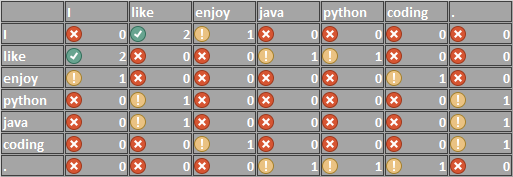

In [70]:
cbr_data = data.copy()

In [71]:
cbr_data.drop(remove, axis=1, inplace=True)
cbr_data.drop('Runtime', axis=1, inplace=True)

In [72]:
cbr_data.head()

Title  Netflix  Hulu  Prime Video  Disney+  \
ID                                                                        
1                        Inception        1     0            0        0   
2                       The Matrix        1     0            0        0   
3           Avengers: Infinity War        1     0            0        0   
4               Back to the Future        1     0            0        0   
5   The Good, the Bad and the Ugly        1     0            1        0   

                         Directors IMDB_Rounded AgeRestriction  \
ID                                                               
1                Christopher Nolan  Really_Good           Teen   
2   Lana Wachowski,Lilly Wachowski  Really_Good          Adult   
3          Anthony Russo,Joe Russo  Really_Good           Teen   
4                  Robert Zemeckis  Really_Good      Non-Adult   
5                     Sergio Leone  Really_Good          Adult   

    Genres_Fantasy  Genres_Sci-Fi  ...  Continent_Oceania  \
ID                                 ...                      
1                0              1  ...                  0   
2                0              1  ...                  0   
3                0              1  ...                  0   
4                0              1  ...                  0   
5                0              0  ...                  0   

    Continent_South America  Continent_NA  Language_NA  Language_Hindi  \
ID                                                                       
1                         0             0            0               0   
2                         0             0            0               0   
3                         0             0            0               0   
4                         0             0            0               0   
5                         0             0            0               0   

    Language_French  Language_Spanish  Language_English  Language_Others  \
ID                                                                         
1                 1                 0                 1                1   
2                 0                 0                 1                0   
3                 0                 0                 1                0   
4                 0                 0                 1                0   
5                 0                 0                 0                1   

        Era  
ID           
1    Modern  
2    Modern  
3    Latest  
4    Golden  
5   Vintage  

[5 rows x 37 columns]

In [73]:
def create_soup(data):
    # Creating a simple text for countvectorizer to work with
    att = data['Title'].lower()
    for i in data[1:]:
            att = att + ' ' + str(i)
            return att

In [74]:
%%time
# Create the soup for count vectorizer
cbr_data['soup'] = cbr_data.apply(create_soup, axis=1)

Wall time: 1.32 s


In [75]:
%%time
# Apply countvectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(cbr_data['soup'])

Wall time: 112 ms


#### Finding Cosine Similarity

In [76]:
%%time
cosine_sim2 = cosine_similarity(count_matrix)

Wall time: 343 ms


In [77]:
# The function will return top 10 movies related to given movie
def get_recommendations_new(title, data, o_data, cosine_sim=cosine_sim2):
    data = data.reset_index()
    indices = pd.Series(data.index, index=cbr_data['Title'])
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    o_data.Genres = o_data.Genres.str.replace(',', '<br>')
    o_data.Directors = o_data.Directors.str.replace(',', '<br>')
    o_data.Country = o_data.Country.str.replace(',', '<br>')
    o_data.Language = o_data.Language.str.replace(',', '<br>')
    return o_data[[
        'Title', 'IMDb', 'Genres', 'Directors', 'Country', 'Language'
    ]].iloc[movie_indices]

In [78]:
l = get_recommendations_new('The Avengers', cbr_data, orig_data.copy(), cosine_sim2)

In [79]:
# Replacing the NA values by -1 for sorting
l.IMDb=l.IMDb.apply(replaceNAby1)
l.IMDb=l.IMDb.astype(float)

In [80]:
# Plotting the dat using plotly
l.sort_values(by='IMDb',ascending=False,inplace=True)
colorscale = [[0, '#477BA8'], [.5, '#C9EEF2'], [1, '#D0F5F5']]
fig = ff.create_table(l, colorscale=colorscale, height_constant=70)

fig.show()

### Content Based Filtering: KNN

In [81]:
cf_data = data.copy()
cf_data.head()

Title  Year  Age IMDb Rotten Tomatoes  Netflix  \
ID                                                                            
1                        Inception  2010  13+  8.8             87%        1   
2                       The Matrix  1999  18+  8.7             87%        1   
3           Avengers: Infinity War  2018  13+  8.5             84%        1   
4               Back to the Future  1985   7+  8.5             96%        1   
5   The Good, the Bad and the Ugly  1966  18+  8.8             97%        1   

    Hulu  Prime Video  Disney+  Type  ... Continent_Oceania  \
ID                                    ...                     
1      0            0        0     0  ...                 0   
2      0            0        0     0  ...                 0   
3      0            0        0     0  ...                 0   
4      0            0        0     0  ...                 0   
5      0            1        0     0  ...                 0   

    Continent_South America Continent_NA Language_NA Language_Hindi  \
ID                                                                    
1                         0            0           0              0   
2                         0            0           0              0   
3                         0            0           0              0   
4                         0            0           0              0   
5                         0            0           0              0   

    Language_French  Language_Spanish  Language_English  Language_Others  \
ID                                                                         
1                 1                 0                 1                1   
2                 0                 0                 1                0   
3                 0                 0                 1                0   
4                 0                 0                 1                0   
5                 0                 0                 0                1   

        Era  
ID           
1    Modern  
2    Modern  
3    Latest  
4    Golden  
5   Vintage  

[5 rows x 44 columns]

In [82]:
# Get dummies for dummy columns
cf_data=pd.get_dummies(cf_data,columns=dummy)

In [83]:
cf_data.drop(remove,
             inplace=True,
             axis=1)

In [84]:
# Dropping title as we do not need it
cf_data.drop('Title', inplace=True, axis=1)

In [85]:
# Label encode the directors column
cf_data.Directors=LabelEncoder().fit_transform(cf_data.Directors)

In [86]:
# Apply the KNN with cosine metric
model_knn = NearestNeighbors(metric='cosine',
                             algorithm='auto',
                             n_neighbors=20,
                             n_jobs=-1)
model_knn.fit(cf_data)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=20)

In [87]:
# Create a function to recommend top 10 movies
def recommend_movies(movie):
    movie_index=cf_data[orig_data.Title==movie].index
    distances, indices = model_knn.kneighbors(np.array(cf_data.iloc[movie_index]).reshape(
    1, -1),n_neighbors=10)
    s_data=orig_data.iloc[indices[0]][['Title','IMDb', 'Age', 'Directors', 'Genres']]
    s_data.IMDb=orig_data.IMDb.apply(replaceNAby1)
    s_data.IMDb=s_data.IMDb.astype(float)
    return s_data.sort_values(by='IMDb',ascending=False)

In [88]:
recommend_movies('The Avengers')

Title  IMDb  Age  \
ID                                                                    
4440                               It's a Wonderful Life   8.6   7+   
4688                                              Pyaasa   8.5   NA   
6732                                     Kaagaz Ke Phool   8.0   NA   
16236  Pirates of the Caribbean: The Curse of the Bla...   8.0  13+   
8686                           It Happened One Christmas   6.2  all   
10052                              The Shadow of Chikara   5.5   7+   
8978                                 Finding Rin Tin Tin   5.1   7+   
14340                            God Don't Make the Laws   4.2  18+   
7364                                    Days of Darkness   3.9  18+   
12710                                 Diamondz n da Ruff   3.8   NA   

               Directors                    Genres  
ID                                                  
4440         Frank Capra      Drama,Family,Fantasy  
4688           Guru Dutt     Drama,Musical,Romance  
6732           Guru Dutt                   Romance  
16236     Gore Verbinski  Action,Adventure,Fantasy  
8686         Donald Wrye            Comedy,Fantasy  
10052      Earl E. Smith            Horror,Western  
8978        Danny Lerner                    Family  
14340      David Sabbath                     Drama  
7364        Denys Arcand      Comedy,Drama,Fantasy  
12710  Dwayne 'DC' Coles               Crime,Drama

In [89]:
# We will be pickling he viriable for our WebApp 
with open('knn_model.pickle', 'wb') as f:
    pickle.dump(model_knn, f)

For WebApp please refer to the movie_recommendation_app.py